In [70]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from datetime import datetime, timedelta
import spiceypy
import healpy
import scipy
import image3d
from importlib import reload
reload(image3d)


<module 'image3d' from '/Users/ruby/Astro/radio3D/image3d.py'>

In [58]:
bl_coords = image3d.get_baselines()

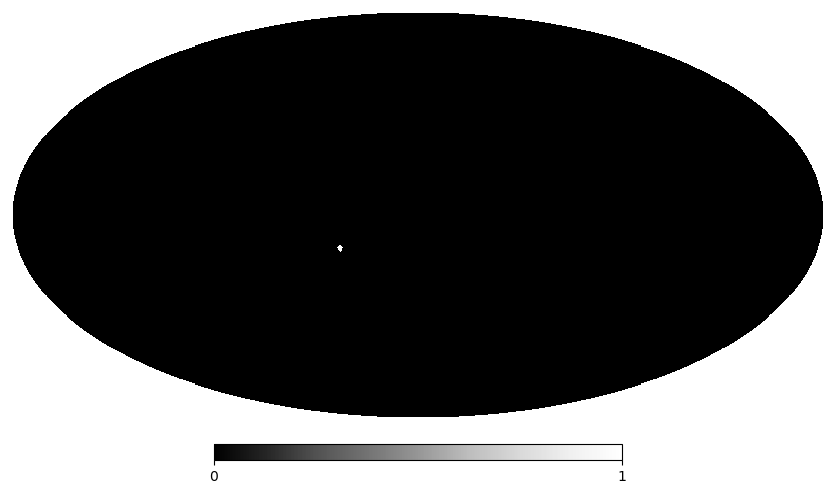

In [59]:
# Create a map to simulate
nside = 32
npix = healpy.nside2npix(nside)
healpix_pixel_vals = np.zeros(npix, dtype=float)

# Create a single source at an arbitrary pixel
healpix_pixel_vals[int(.6*npix)] = 2

# Plot
proj = healpy.mollview(
    map=healpix_pixel_vals,
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="",
    min=0,
    max=1,
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
plt.show()

In [60]:
visibilities = image3d.simulate_visibilities(
    bl_coords,
    healpix_pixel_vals,
)

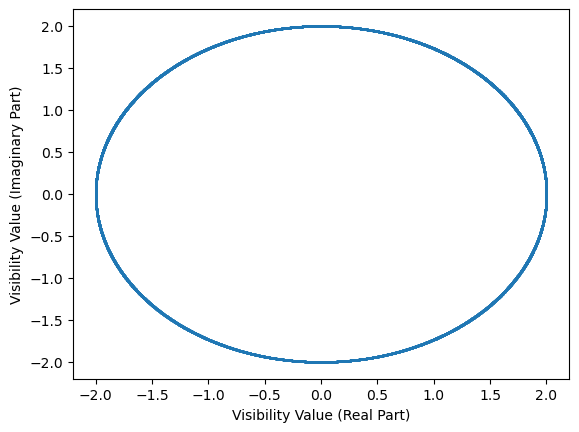

In [61]:
# Confirm that the visibilites are consistent with a single point source
plt.plot(np.real(visibilities), np.imag(visibilities), ".", markersize=1)
plt.xlabel("Visibility Value (Real Part)")
plt.ylabel("Visibility Value (Imaginary Part)")
plt.show()

In [62]:
# Image reconstruction in spherical harmonics
l_max = 20
alms, l_vals, m_vals = image3d.spherical_harmonic_imaging(
    visibilities,
    bl_coords,
    l_max,
)

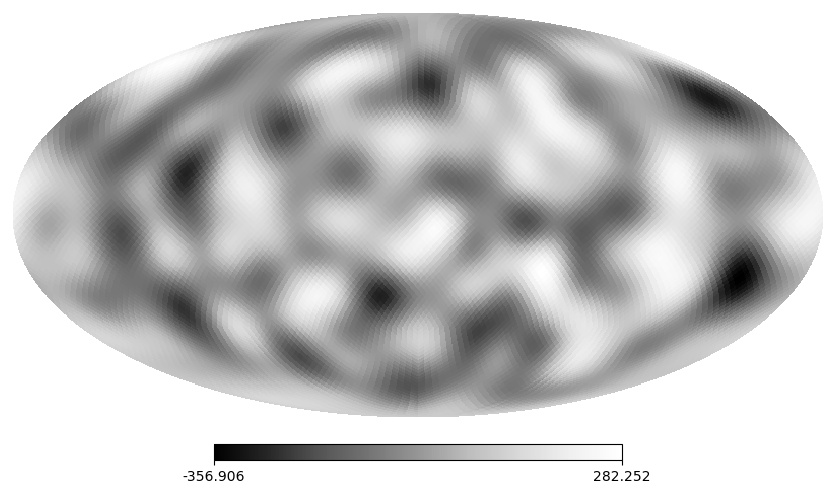

In [63]:
# Plot reconstructed map
reconstructed_pixel_vals = image3d.alms_to_map_healpy(alms, nside)
proj = healpy.mollview(
    map=reconstructed_pixel_vals,
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
plt.show()

/Users/ruby/opt/anaconda3/envs/py310/lib/python3.10/site-packages/healpy/projector.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


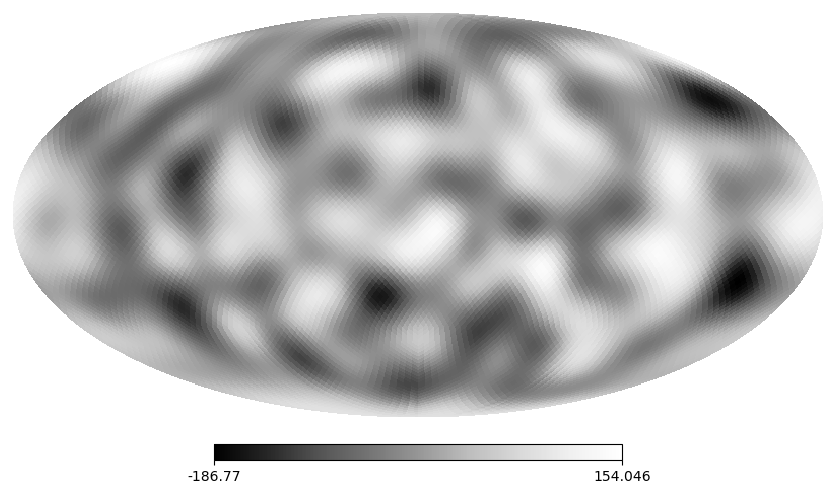

In [64]:
# Try reconstructing the map with explicit spherical harmonic calculations, without mirroring the m-axis
reconstructed_pixel_vals_2 = image3d.alms_to_map(
    alms,
    l_vals,
    m_vals,
    nside,
    mirror_m=False,
)
proj = healpy.mollview(
    map=reconstructed_pixel_vals_2,
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
plt.show()

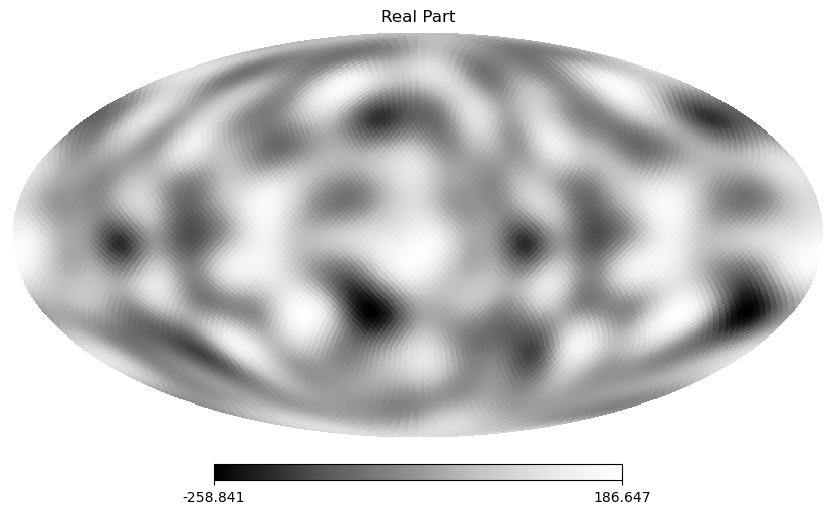

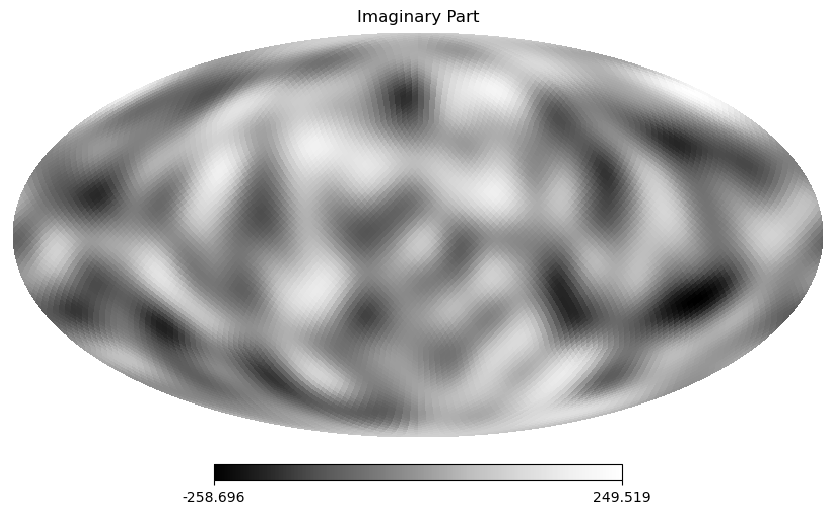

In [65]:
# Try reconstructing the map with explicit spherical harmonic calculations, now mirroring the m-axis
reconstructed_pixel_vals_3 = image3d.alms_to_map(
    alms,
    l_vals,
    m_vals,
    nside,
    mirror_m=True,
)
proj = healpy.mollview(
    map=np.real(reconstructed_pixel_vals_3),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Real Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
plt.show()
proj = healpy.mollview(
    map=np.imag(reconstructed_pixel_vals_3),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Imaginary Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
plt.show()

In [71]:
reconstructed_pixel_vals_4 = image3d.pixel_based_imaging(
    visibilities,
    bl_coords,
    nside,
)

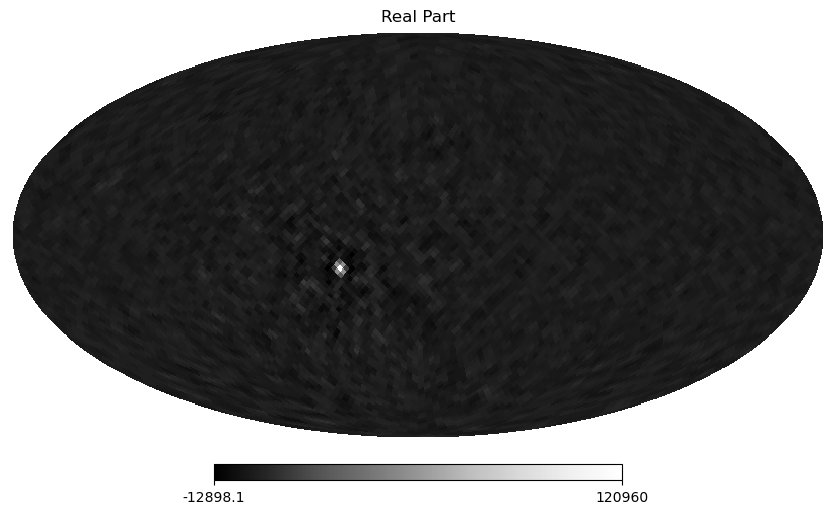

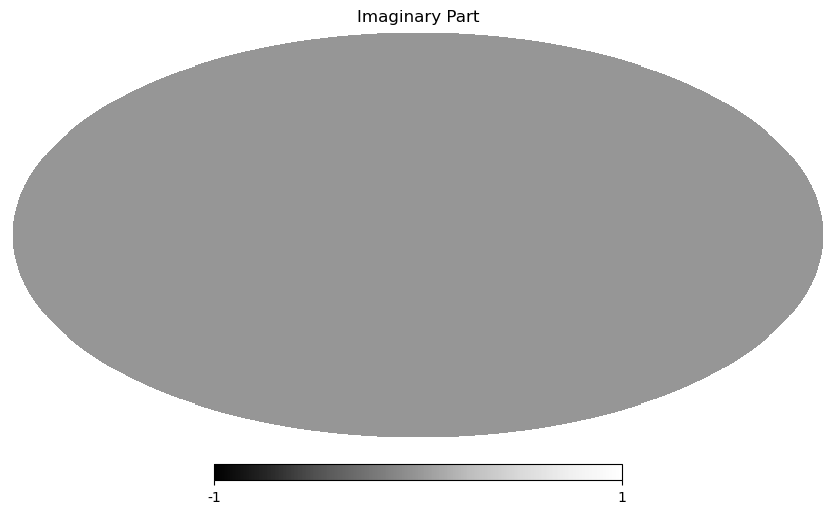

In [72]:
proj = healpy.mollview(
    map=np.real(reconstructed_pixel_vals_4),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Real Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
proj = healpy.mollview(
    map=np.imag(reconstructed_pixel_vals_4),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Imaginary Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)